In [13]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [55]:
class Line:
    def __init__(self,origin=0,angle=5):
        self.origin = origin;
        self.angle = angle;
    def get(self,arr):
        y = np.tan(self.angle)*(np.array(arr)-self.origin)
        x = np.array(arr);
        return np.array([x,y])
        
class Laser_Scanner:
    def __init__(self, num_beams, angle, focal_point):
        #assume odd
        self.n = num_beams;
        self.angle = angle*np.pi/180;
        self.focal_point = focal_point;
        self.lines = [];
        self._create_lines();
    def _create_lines(self):
        for i in range(0,self.n):
            self.lines.append(Line(self.focal_point,(i+-1*int(self.n/2))*self.angle));
class Sinusoidal_Curve:
    def __init__(self,f=1,offset=2,peak=1):
        self.f = f;
        self.offset = offset;
        self.peak = peak;
        self.shift = 0;
    def rotate(self,ang):
        self.shift = (ang/180)*np.pi;
    def get(self,arr_theta):
        r = self.peak*np.sin(2*np.pi*self.f*arr_theta+self.shift*self.f)+self.offset
        x = abs(r)*np.cos(2*np.pi*arr_theta)
        y = abs(r)*np.sin(2*np.pi*arr_theta)
        return np.array([x,y])
def get_Intersection(x,y,x_r,y_r):
    closest_point = [-1,-1];
    td = 10;
    for i in range(0,len(x)):
        for j in range(0,len(x_r)):
            d = np.sqrt((x[i]-x_r[j])**2+(y[i]-y_r[j])**2);
            if (d<td):
                td = d;
                closest_point = [x[i],y[i]];
    return closest_point,td;

In [110]:
#Initialize Scanner
scanner = Laser_Scanner(3,20,-5)
#Initialize Object to be Scanned
scan_obj = Sinusoidal_Curve(5,4,0.5)

Angle = -20.0 	Slope = -0.36397023426620234
Angle = 0.0 	Slope = 0.0
Angle = 20.0 	Slope = 0.36397023426620234


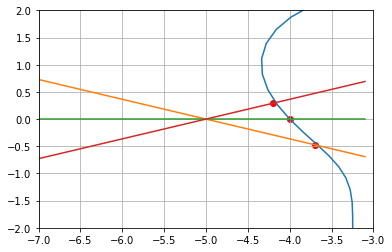

In [111]:
x_min,x_max,x_step = -10,-3,0.1
x_sweep = np.arange(x_min,x_max,x_step)

#plt.xlim(x_min,x_max)
#plt.ylim(x_min,x_max)
plt.xlim(-7,-3)
plt.ylim(-2,2)

plt.figure(1)
thetas = np.arange(0,1,0.01)
[x_r,y_r] = scan_obj.get(thetas)
#Radial Curve
plt.plot(x_r,y_r)
x_int = [];
scan_obj.rotate(0)
for line in scanner.lines:
    plt.grid();
    [x,y] = line.get(x_sweep);
    #Laser Lines
    plt.plot(x,y)
    print("Angle =",line.angle*180/np.pi,"\tSlope =", np.tan(line.angle))
    closest_point,td = get_Intersection(x,y,x_r,y_r)
    x_int.append(closest_point)
for i in range(0,len(scanner.lines)):
    plt.scatter(x_int[i][0],x_int[i][1],c='r')

In [112]:
thetas = np.arange(0,1,0.01)

intersections = [];
errors = [];
for i in range(0,360):
    scan_obj.rotate(i)
    [x_r,y_r] = scan_obj.get(thetas) #Radial Curve
    [x,y] = scanner.lines[2].get(x_sweep); #Laser Lines
    closest_point,td = get_Intersection(x,y,x_r,y_r)
    intersections.append(closest_point)
    errors.append(td)

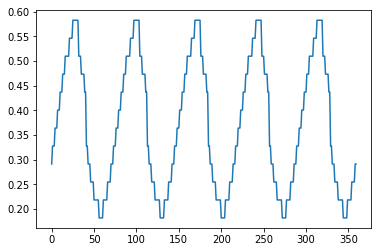

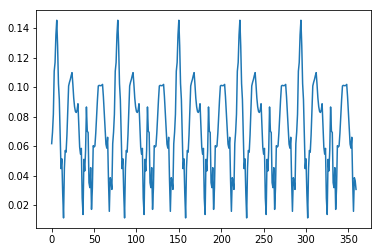

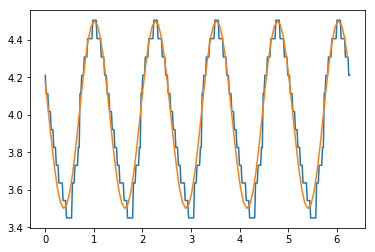

In [113]:
thetas = np.arange(0,1,0.01)
scan_obj.rotate(32)
[x_r,y_r] = scan_obj.get(thetas)
heights = []
for point in intersections:
    heights.append(point[1])
distO2C = 5;
radii = np.sqrt(((distO2C-heights/np.tan(scanner.lines[2].angle))**2+np.array(heights)**2))
plt.figure(1)
plt.plot(heights)
plt.figure(2)
plt.plot(errors)
plt.figure(3)
plt.plot(np.arange(0,360)/180*np.pi,radii)
plt.plot(thetas*2*np.pi,np.sqrt(x_r**2+y_r**2))

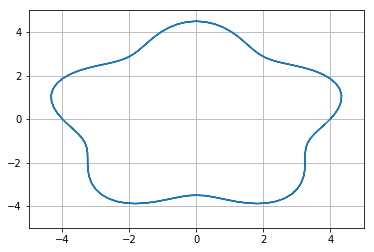

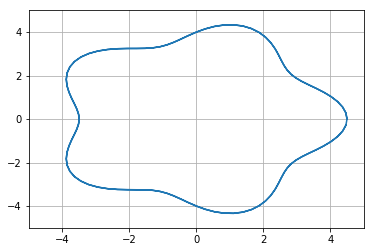

In [114]:
plt.figure(1)
plt.grid()
plt.xlim(-5,5)
plt.ylim(-5,5)
scan_obj.rotate(0)
thetas = np.arange(0,2,0.01)
[x_r,y_r] = scan_obj.get(thetas)
plt.plot(x_r,y_r)
plt.figure(2)
plt.grid()
plt.xlim(-5,5)
plt.ylim(-5,5)
scan_obj.rotate(90)
thetas = np.arange(0,2,0.01)
[x_r,y_r] = scan_obj.get(thetas)
plt.plot(x_r,y_r)

In [104]:
scanner.lines[2].angle*180/np.pi

10.0

In [77]:
radii

0.9945218953682733